### Importing Libraries ###

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')
%precision 2

'%.2f'

### Reading Data ###

In [121]:
df=pd.read_csv('911.csv')
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


**(Rows,Columns)**

In [122]:
df.shape

(99492, 9)

**Total Number of Entries and Data type of each column**

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Top 5 zip codes**

In [124]:
df['zip'].value_counts().iloc[:5]

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**Emergencies are divded into 3 types EMS,Fire,Traffic and are added to a new column known as 'reason'**

In [125]:
df['reason']=df['title'].apply(lambda x:x.split (':')[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


**Most common reason of emergencies based on new column.**

In [126]:
df['reason'].value_counts().iloc[:3]

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

**Converting Dtype of timestamp from string to datetime.**

In [127]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

**Countplot on column 'reason'**

<AxesSubplot:xlabel='reason', ylabel='count'>

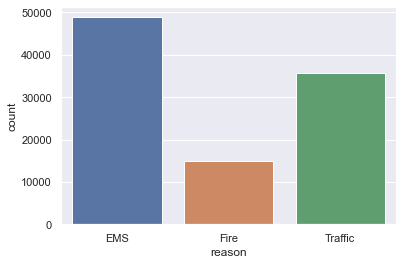

In [128]:
import seaborn as sns
sns.countplot(x='reason',data=df)

**Separating Hour,Month,Day of Week from column timestamp and storing each data into new column**

In [129]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['Hour'] = df['timeStamp'].apply(lambda time:time.hour)
df['Month'] = df['timeStamp'].apply(lambda time:time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time:time.dayofweek)
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


**It would difficult to read day of week in integer format so naming each day and storing it in same column**

In [130]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].apply(lambda int:dmap[int])
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


<AxesSubplot:xlabel='reason', ylabel='Hour'>

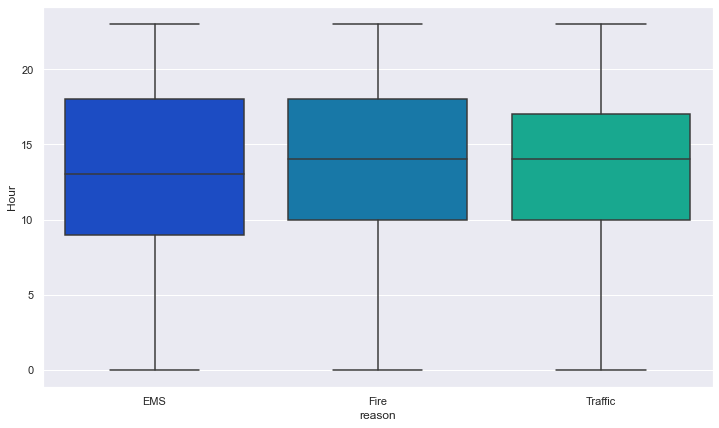

In [131]:
plt.figure(figsize=(12, 7))
sns.boxplot(y='Hour',x='reason',data=df,palette='winter')

This says that most of the accidents or emergencies occur between 10am to 7pm.
This is because its the peak time for people to go to the office or reach home.

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

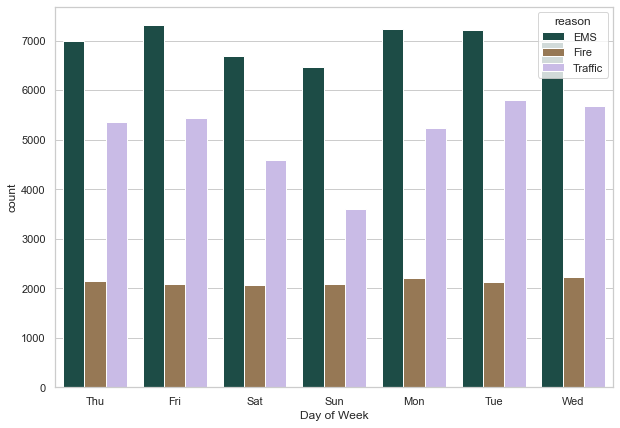

In [132]:
sns.set(rc={'figure.figsize':(10,7)})
sns.set_style('whitegrid')
sns.countplot(x='Day of Week',hue='reason',data=df,palette='cubehelix')

On each day Emergency medical services are at the top.

**Top reasons to call 911 are-**

In [133]:
df['title'].value_counts().iloc[:5]

Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
Name: title, dtype: int64

In [134]:
# Number of unique address
df['addr'].nunique()

21914

**Top 5 address- These are address from where most of the people calling for emergency services**

In [135]:
df['addr'].value_counts().iloc[:5]

SHANNONDELL DR & SHANNONDELL BLVD    938
MAIN ST & OLD SUMNEYTOWN PIKE        390
THE FAIRWAY  & RYDAL RD              260
GULPH RD & KIRK AVE                  235
EVERGREEN RD & W LIGHTCAP RD         232
Name: addr, dtype: int64

In [136]:
# Top 5 townships
df['twp'].value_counts().iloc[:5]

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [137]:
# There are around 110 unique medical emergencies.
df['title'].nunique()

110

**Option**                                                                                                                        
df['Month']=df['Month']
dmap = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
df['Month'] = df['Month'].apply(lambda int:dmap[int])
df.head(5)

**Top 5 months** 

In [138]:
df['Month'].value_counts().iloc[:5]

1    13205
7    12137
6    11786
2    11467
5    11423
Name: Month, dtype: int64

**Value_counts of each column with respect to particular month in tabular form**

In [139]:
byMonth=df.groupby(by='Month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


In [140]:
byhour = df.groupby(by='Hour').count()
byhour

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Month,Day of Week
Hour,,,,,,,,,,,,
0,2112,2112,2112,1869,2112,2112,2109,2105,2112,2112,2112,2112
1,1721,1721,1721,1530,1721,1721,1718,1714,1721,1721,1721,1721
2,1549,1549,1549,1350,1549,1549,1548,1543,1549,1549,1549,1549
3,1435,1435,1435,1264,1435,1435,1433,1431,1435,1435,1435,1435
4,1418,1418,1418,1254,1418,1418,1418,1415,1418,1418,1418,1418
5,1629,1629,1629,1401,1629,1629,1628,1628,1629,1629,1629,1629
6,2513,2513,2513,2112,2513,2513,2511,2504,2513,2513,2513,2513
7,3970,3970,3970,3418,3970,3970,3969,3947,3970,3970,3970,3970
8,5044,5044,5044,4385,5044,5044,5044,5023,5044,5044,5044,5044


**After August there was drop in counts of accidents**

<AxesSubplot:xlabel='Month'>

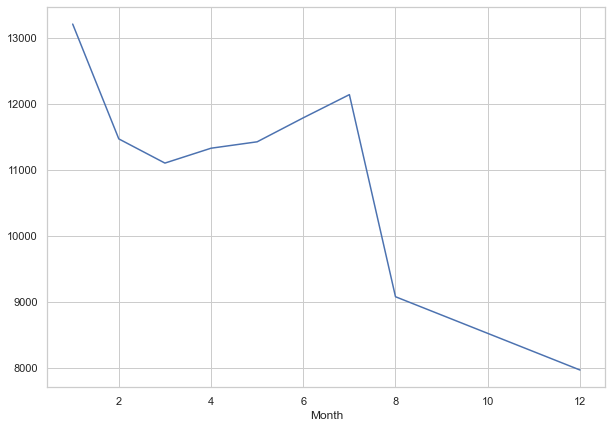

In [141]:
byMonth['lat'].plot()

**Dots shows the correlation between Month and Latitude**

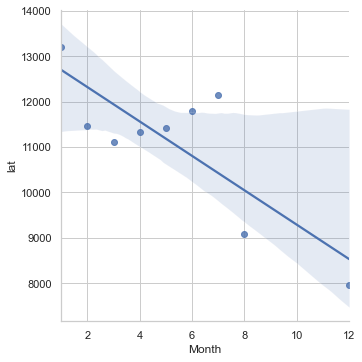

In [142]:
byMonth['Month'] = byMonth.index
sns.lmplot(x='Month', y='lat', data=byMonth)

**Co-relation between Month and Counts**

**Separating Dates from column timestamp and storing it in new column Date**

In [143]:
df['Date'] = df['timeStamp'].apply(lambda time:time.date())
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


**On which Date there were maximum counts of accident with respect to latitude**

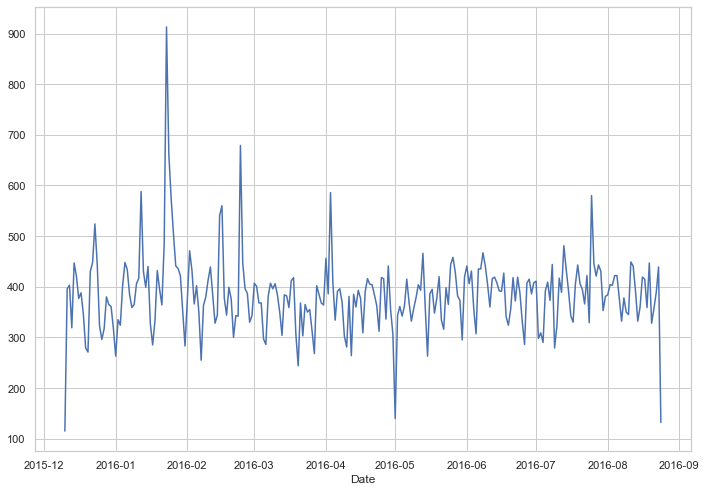

In [144]:
df.groupby(by='Date').count()['lat'].plot()
plt.tight_layout()

**Traffic**

Text(0.5, 1.0, 'Traffic')

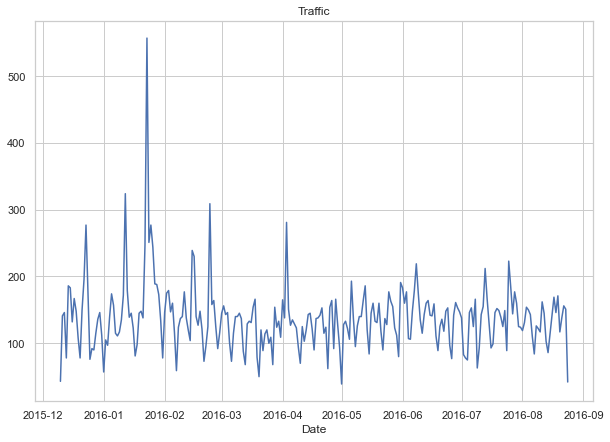

In [145]:
df[df['reason']=='Traffic'].groupby(by='Date').count()['lat'].plot()
plt.title('Traffic')

**Emergency Medical Services(EMS)**

Text(0.5, 1.0, 'EMS')

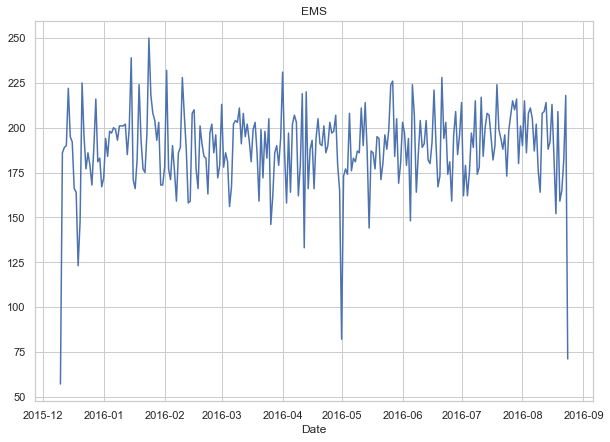

In [146]:
df[df['reason']=='EMS'].groupby(by='Date').count()['lat'].plot()
plt.title('EMS')

**Fire**

Text(0.5, 1.0, 'Fire')

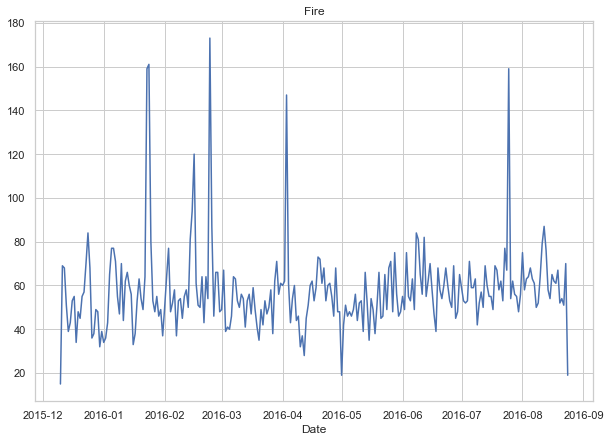

In [147]:
df[df['reason']=='Fire'].groupby(by='Date').count()['lat'].plot()
plt.title('Fire')

**This is groupby tablular form which shows specific emergencies and their value_counts with respect to their geographical locations,zipcode,address,etc**

In [148]:
bytitle = df.groupby(by='title').count()
bytitle.head(10)

,lat,lng,desc,zip,timeStamp,twp,addr,e,reason,Hour,Month,Day of Week,Date
title,,,,,,,,,,,,,
EMS: ABDOMINAL PAINS,1436,1436,1436,1354,1436,1436,1436,1436,1436,1436,1436,1436,1436
EMS: ACTIVE SHOOTER,2,2,2,2,2,2,2,2,2,2,2,2,2
EMS: ALLERGIC REACTION,438,438,438,410,438,438,438,438,438,438,438,438,438
EMS: ALTERED MENTAL STATUS,1386,1386,1386,1300,1386,1385,1386,1386,1386,1386,1386,1386,1386
EMS: AMPUTATION,14,14,14,12,14,14,14,14,14,14,14,14,14
EMS: ANIMAL BITE,83,83,83,74,83,83,83,83,83,83,83,83,83
EMS: APPLIANCE FIRE,11,11,11,11,11,11,11,11,11,11,11,11,11
EMS: ASSAULT VICTIM,657,657,657,597,657,657,657,657,657,657,657,657,657
EMS: BACK PAINS/INJURY,739,739,739,687,739,739,739,739,739,739,739,739,739


**This shows the numbers of calls reported or number of emergencies reported on a certain day in a specific month**

In [149]:
weekmonth = df.groupby(by=['Day of Week','Month']).count()['reason'].unstack()
weekmonth

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


**Separating Year from column Date**

In [150]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day of Week,Date,Year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10,2015


Separated Year from Date column.

**Implies- The given Data is only of Two years [2015,2016]**

In [151]:
df['Year'].nunique()

2

**Total Number of calls reported in 2015 and 2016 in a specific month**

In [152]:
yearmonth = df.groupby(by=['Year','Month']).count()['reason'].unstack()
yearmonth

Month,1,2,3,4,5,6,7,8,12
Year,,,,,,,,,
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7969.0
2016,13205.0,11467.0,11101.0,11326.0,11423.0,11786.0,12137.0,9078.0,NaN


**As the color gets brighter it is the sign of maximum number of calls reported in that month
and as the color gets darker it is the sign of decreasing number of reported calls in that month**

<AxesSubplot:xlabel='Month', ylabel='Year'>

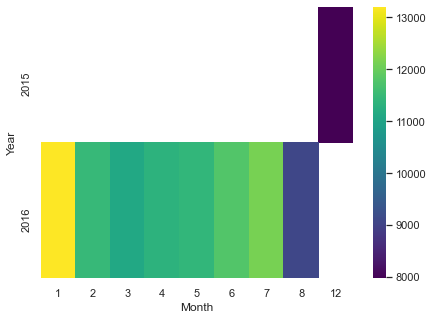

In [153]:
plt.figure(figsize=(7,5))
sns.heatmap(yearmonth, cmap='viridis')

In [154]:
df['twp'].nunique()

68

**JenkinTown and Lower Salford these townships have highest number of calls reported**

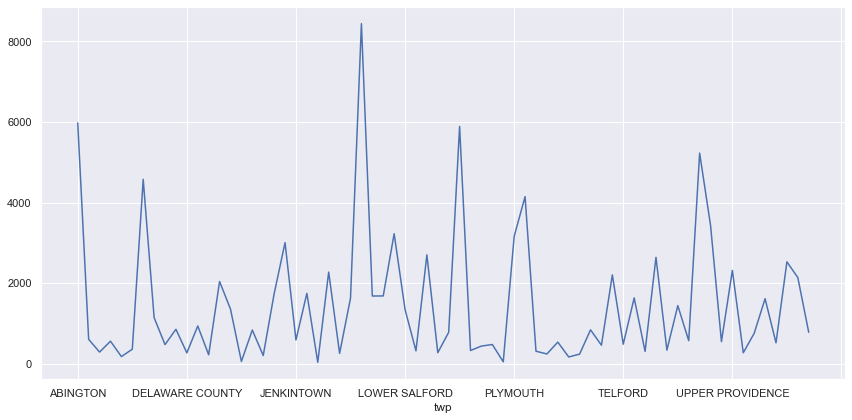

In [155]:
sns.set(font_scale = 1)
plt.figure(figsize=(12, 6))
df.groupby(by='twp').count()['reason'].plot()
plt.tight_layout()

# Conclusion